In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

First we will read the data avaliable:

In [2]:
cal = pd.read_csv('./calendar.csv')
listing = pd.read_csv('./listings.csv')
review = pd.read_csv('./reviews.csv')

Next we will clead the data defining some functions to:<br> 
    - Trasnform the price value from string to float<br> 
    - Transform the date columns to a Pandas datetime columns<br> 
    - Finally set the columns that have True and False values as 't/f' to boolean Values os True and False

In [3]:
def price_to_numeric(price_str):
    try:
        return float(price_str[1:])
    except:
        return None

In [30]:
def percentage_to_numeric(pct_str):
    try:
        return float(pct_str[:-1])/100
    except:
        return None

In [4]:
def clean_calendar_df(df):
  # Cleans calendar.csv Pandas DataFrame
    
    df.date=pd.to_datetime(df.date)
    df.price=df.price.apply(lambda x: price_to_numeric(x))
    df.available=df.available.apply(lambda x: True if x=='t' else False)
    
    return df

In [22]:
def clean_listing_df(df,date_columns,t_f_columns,percent_columns,price_columns):
  
   # Cleans listing.csv Pandas DataFrame

    for date_col in date_columns:
        df[date_col]=pd.to_datetime(df[date_col])
    
    for t_f_col in t_f_columns:
        df[t_f_col]=df[t_f_col].apply(lambda x: True if x=='t' else False)
        
    for percent_col in percent_columns:
        df[percent_col]=df[percent_col].apply(lambda x: percentage_to_numeric(x))
        
    for price_col in price_columns:
        df[price_col]=df[price_col].apply(lambda x: price_to_numeric(x))

        
    return df

In [7]:
cal=clean_calendar_df(cal)

In [33]:
date_columns_listing=['last_scraped','host_since','calendar_last_scraped','first_review','last_review']

true_false_listing_columns=['host_is_superhost','host_has_profile_pic','host_identity_verified',
                            'is_location_exact','has_availability','requires_license','instant_bookable',
                            'require_guest_profile_picture','require_guest_phone_verification']

percentage_columns_listing=['host_response_rate','host_acceptance_rate']

price_columns_listing=['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']


listing=clean_listing_df(listing,
                         date_columns_listing,
                         true_false_listing_columns,
                         percentage_columns_listing,
                         price_columns_listing)

Examining the listing DataFrame:

In [35]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,0.96,1.0,False,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,True,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,NaN,WASHINGTON,False,moderate,False,False,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,0.98,1.0,True,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,NaN,NaN,100.0,40.0,1,0.0,2,90,today,True,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,False,NaN,WASHINGTON,False,strict,True,True,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,

Examining the calendar DataFrame:

In [93]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


### Question #1: What neighbourhoods generate most revenue this year?

We will assume that when the property is not avaliable it is so becouse it is being rented at the last listing price <br>
<br>
Doingo so we will fin out what whas the last listing price ordering the data by the date of the calendar DataFrame and using the ffill methon in "fillna" function os Pandas:

In [55]:
cal_sorted=cal.sort_values(by=['listing_id','date'])

In [57]:
cal_sorted=cal_sorted.groupby(['listing_id'], as_index=False).fillna(method='ffill')

This way we can now calculate the average revenue the each property generated, droping values that we don`t know the listing price when the first days of the calendar had no value:

In [106]:
avg_revenue_id=cal_sorted.dropna(subset=['price']).groupby('listing_id').sum().reset_index()

In [107]:
avg_revenue_id=avg_revenue_id.rename(columns={'price':'revenue'})

In [109]:
avg_revenue_id['avg_rev']=avg_revenue_id.revenue/avg_revenue_id.available

In [110]:
listing=listing.merge(avg_revenue_id[['listing_id','avg_rev','revenue']],left_on='id',right_on='listing_id',how='left')

In [111]:
avg_revenue_id=listing.groupby('neighbourhood').mean()[['avg_rev','revenue']]

Finally we can plot the neighbourhoods tha had tje mos avarage revenue in this year:

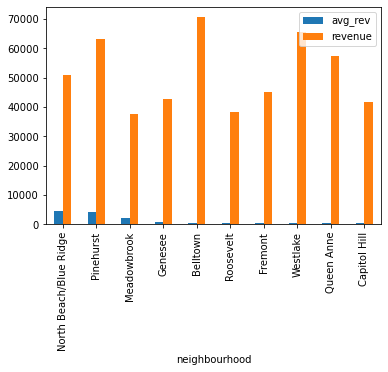

In [115]:
avg_revenue_id.sort_values(by='avg_rev',ascending=False).head(10).plot.bar()

In [98]:
list(avg_revenue_id.sort_values(by='avg_rev',ascending=False).head(3).index)

['North Beach/Blue Ridge', 'Pinehurst', 'Meadowbrook']

By looking at the date we'll notice some columns are mere indicators of the listing id such as url, pictures_url as so on.
Others are highly descriptive and are to cumbersome to use as comparisson such as neighborhood_overview,transit, etc

We will define the columns that have well defined cetegories such as host_response_time and true/false columns

In [16]:
categorical_listing=['host_response_time',
                     'host_is_superhost',
                     'host_neighbourhood',
                     'neighbourhood',
                     'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed',
                     'host_has_profile_pic',
                     'host_identity_verified',
                     'is_location_exact',
                     'property_type',
                     'room_type',
                     'bed_type',
                     'calendar_updated',
                     'has_availability',
                     'instant_bookable',
                     'cancellation_policy',
                     'require_guest_profile_picture',
                     'require_guest_phone_verification'
                    ]

In [121]:
cal[cal.listing_id==270370].sum()

listing_id    98685050.0
available           69.0
price            14490.0
dtype: float64

In [118]:
listing[listing.neighbourhood=='North Beach/Blue Ridge']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_x,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id_x,avg_rev_x,listing_id_y,avg_rev_y,listing_id_x,avg_rev_x,listing_id_y,avg_rev_y,price_y,listing_id,avg_rev,revenue
3252,270370,https://www.airbnb.com/rooms/270370,20160104002432,2016-01-04,"NorthBeach, fantastic water view",Charming 1951 Mid-century modern with contempo...,"Very relaxing home, make you feel like home in...",Charming 1951 Mid-century modern with contempo...,none,"There's nowhere in Seattle that is as nice, as...",NaN,"Direct Bus to Ballard, downtown Seattle a bloc...",https://a2.muscache.com/ac/pictures/2708557/dd...,https://a2.muscache.com/im/pictures/2708557/dd...,https://a2.muscache.com/ac/pictures/2708557/dd...,https://a2.muscache.com/ac/pictures/2708557/dd...,1309213,https://www.airbnb.com/users/show/1309213,Audrey And Benoit,2011-10-18,"Seattle, Washington, United States","we are a french couple , living in seattle for...",NaN,NaN,1.0,False,https://a0.muscache.com/ac/users/1309213/profi...,https://a0.muscache.com/ac/users/1309213/profi...,North Beach/Blue Ridge,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,False,"24th Ave NW, Seattle, WA 98117, United States",North Beach/Blue Ridge,North Beach/Blue Ridge,Other neighborhoods,Seattle,WA,98117,Seattle,"Seattle, WA",US,United States,47.698181,-122.387101,True,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,210.0,550.0,NaN,300.0,80.0,1,0.0,1,365,6 days ago,True,2,32,60,69,2016-01-04,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,WASHINGTON,False,moderate,False,False,1,NaN,270370.0,1025.652174,270370.0,1025.652174,270370.0,1025.652174,270370.0,1025.652174,70770.0,270370.0,1025.652174,70770.0
3253,7221204,https://www.airbnb.com/rooms/7221204,20160104002432,2016-01-04,Private North Beach Ocean View Room,Open the french doors to the garden & take in ...,"A spacious room with queen bed, a cozy recline...",Open the french doors to the garden & take in ...,none,North Beach is on a private stretch of beach o...,We have two young boys in the floors above you...,Just 2 blocks up you can catch the city Metro ...,https://a2.muscache.com/ac/pictures/98608944/d...,https://a2.muscache.com/im/pictures/98608944/d...,https://a2.muscache.com/ac/pictures/98608944/d...,https://a2.muscache.com/ac/pictures/98608944/d...,37801519,https://www.airbnb.com/users/show/37801519,Jackie,2015-07-07,"Seattle, Washington, United States",My family and I moved to this little piece of ...,within a few hours,1.0,1.0,False,https://a0.muscache.com/ac/users/37801519/prof...,https://a0.muscache.com/ac/users/37801519/prof...,North Beach/Blue Ridge,1.0,1.